In [20]:
import os
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import adam_v2
import matplotlib.pyplot as plt

In [2]:
# Set the path to the dataset 
train_dir = '/Volumes/SSD/dishes'
valid_dir = '/Volumes/SSD/dishes-val'
test_dir = '/Volumes/SSD/dishes-test'

In [23]:
# Define the input image size
img_shape = (224, 224, 3)
img_width, img_height = 224, 224
# Set the number of epochs and batch size
epochs = 20
batch_size = 32

In [4]:
# Create an ImageDataGenerator to augment and preprocess your training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Create an ImageDataGenerator to preprocess your validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for your training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_shape[:2],
    batch_size=batch_size,
    class_mode='binary')

# Create a generator for your validation data
val_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size=img_shape[:2],
    batch_size=batch_size,
    class_mode='binary')

Found 1985 images belonging to 2 classes.
Found 833 images belonging to 2 classes.


In [ ]:
# Define your CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=img_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# Compile your model
model.compile(optimizer=adam_v2.Adam(learning_rate=0.0001, decay=0.0001/epochs), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Train your model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.n // batch_size,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=val_generator.n // batch_size)

# Save your model
model.save('my_food_classifier.h5')

Epoch 1/20
62/62 [==============================] - 130s 2s/step - loss: 0.4809 - accuracy: 0.7737 - val_loss: 0.5971 - val_accuracy: 0.6899
Epoch 2/20
62/62 [==============================] - 122s 2s/step - loss: 0.4584 - accuracy: 0.7819 - val_loss: 0.6194 - val_accuracy: 0.6899
Epoch 3/20
62/62 [==============================] - 119s 2s/step - loss: 0.4379 - accuracy: 0.8039 - val_loss: 0.6309 - val_accuracy: 0.7163
Epoch 4/20
62/62 [==============================] - 119s 2s/step - loss: 0.4467 - accuracy: 0.7916 - val_loss: 0.6457 - val_accuracy: 0.6947
Epoch 5/20
62/62 [==============================] - 119s 2s/step - loss: 0.4397 - accuracy: 0.7911 - val_loss: 0.6167 - val_accuracy: 0.6947
Epoch 6/20
62/62 [==============================] - 118s 2s/step - loss: 0.4324 - accuracy: 0.7901 - val_loss: 0.7002 - val_accuracy: 0.6791
Epoch 7/20
62/62 [==============================] - 119s 2s/step - loss: 0.4229 - accuracy: 0.7977 - val_loss: 0.6688 - val_accuracy: 0.6719
Epoch 8/20
62

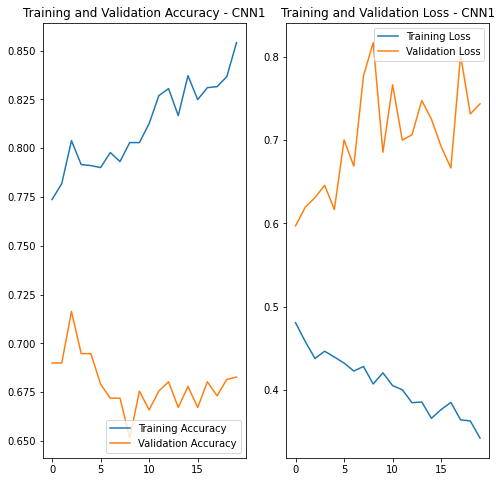

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy - CNN1')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss - CNN1')
plt.show()

In [24]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

Found 2321 images belonging to 2 classes.
73/73 [==============================] - 37s 507ms/step - loss: 0.7925 - accuracy: 0.6661
Test accuracy: 0.6660922169685364
